In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

In [2]:
import mdtraj as md
import os

from msmbuilder.featurizer import RawPositionsFeaturizer
from msmbuilder.cluster import KCenters

In [3]:
data_path = os.path.expanduser('~/Documents/GitHub/TryMSMbuilder/data/pnas2011a-A-1-no-water-no-lipid/pnas2011a-A-1-no-water-no-lipid-000.dcd'
                   )
topology_path = os.path.expanduser('~/Documents/GitHub/TryMSMbuilder/data/topologies/pnas2011a-A-0-no-water-no-lipid.pdb'
                   )
traj = md.load_dcd(data_path,top = topology_path,stride = 200)

In [4]:
inds =[] #indices of Cs in the aromatic ring
atoms_in_ring = ['C8','C9','C10','C11','C12','C13']
ligands = [residue for residue in traj.topology.chain(1).residues][:-1]
for ligand in ligands:
    iis = [atom.index for atom in traj.topology.chain(1).atoms if atom.name in atoms_in_ring
          and atom.residue == ligand]
    inds.append(iis)

In [5]:
RawPosFeaturizer = RawPositionsFeaturizer(inds[0])
RawPosSeq = RawPosFeaturizer.partial_transform(traj)

In [6]:
ligand_pos_x = []
ligand_pos_y = []
ligand_pos_z = []

LigAvePos = []
for item in RawPosSeq:
    this_x = np.mean(item[::3])
    this_y = np.mean(item[1::3])
    this_z = np.mean(item[2::3])
    
    ligand_pos_x.append(this_x)
    ligand_pos_y.append(this_y)
    ligand_pos_z.append(this_z)
    
    LigAvePos.append([this_x,this_y,this_z])
LigAvePos = np.array(LigAvePos)

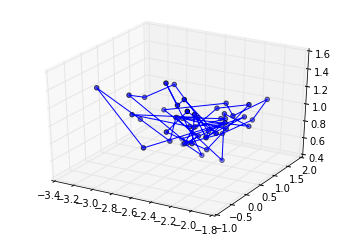

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

ax.plot(ligand_pos_x,ligand_pos_y,ligand_pos_z)
ax.scatter(ligand_pos_x,ligand_pos_y,ligand_pos_z)



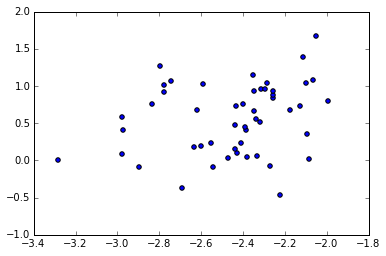

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(ligand_pos_x,ligand_pos_y)


In [9]:
first_res = str(traj.topology.chain(0).residue(0))
import re
match = re.match(r"([a-z]+)([0-9]+)", first_res, re.I)
if match:
    items = match.groups()
first_res_number = int(items[-1])

In [10]:
target_res = traj.topology.chain(0).residue(113-first_res_number)

In [11]:
res_ind = [atom.index for atom in target_res.atoms if atom.name in ['OD1']]

In [12]:
RawPosFeaturizerRes = RawPositionsFeaturizer(res_ind)
RawPosSeqRes = RawPosFeaturizerRes.partial_transform(traj)

In [13]:
res_pos_x = []
res_pos_y = []
res_pos_z = []
for item in RawPosSeqRes:
    this_x = np.mean(item[::3])
    this_y = np.mean(item[1::3])
    this_z = np.mean(item[2::3])
    
    res_pos_x.append(this_x)
    res_pos_y.append(this_y)
    res_pos_z.append(this_z)

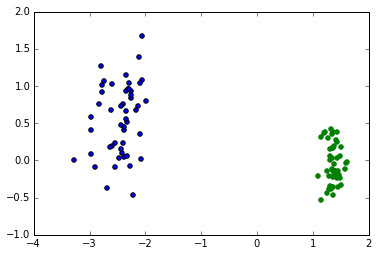

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(ligand_pos_x,ligand_pos_y)
ax.scatter(res_pos_x,res_pos_y,color='Green')

In [15]:
all_seq = []
all_seq.append(LigAvePos)
all_seq.append(RawPosSeqRes)

In [16]:
all_seq[0].shape

(50, 3)

In [17]:
clustering = KCenters(n_clusters = 2)
assignments = clustering.fit_predict(all_seq)

In [18]:
assignments

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])]

Now let's try to load one entire run as a list of mdtraj objects. We will get the topology from /data/topologies and use the file name to figure the right topology .pdb to use.

In [85]:
import utilities as util
reload(util)

<module 'utilities' from 'utilities.py'>

In [86]:
parent_dir = '/Users/shenglanqiao/Documents/GitHub/TryMSMbuilder/data'
A_run_dir = '/pnas2011a-A-1-no-water-no-lipid'
dir_top = '/Users/shenglanqiao/Documents/GitHub/TryMSMbuilder/data/topologies'
#condition A, run 1
trajs_A_1 = util.load_trajs(A_run_dir,parent_dir,dir_top,load_stride = 1000)

In [87]:
inds =[] #indices of Cs in the aromatic ring
atoms_in_ring = ['C8','C9','C10','C11','C12','C13']
ligands = [residue for residue in trajs_A_1[0].topology.chain(1).residues][:-1]
for ligand in ligands:
    iis = [atom.index for atom in trajs_A_1[0].topology.chain(1).atoms if atom.name in atoms_in_ring
          and atom.residue == ligand]
    inds.append(iis)

In [92]:
RawPosFeaturizer = RawPositionsFeaturizer(inds[0])
this_seq = []
for this_traj in trajs_A_1:
    this_RawPosSeq = RawPosFeaturizer.partial_transform(this_traj)
    
    this_seq.extend(util.ring_center_seq(this_RawPosSeq))
    
this_seq = np.array(this_seq)

In [93]:
len(this_seq)

20

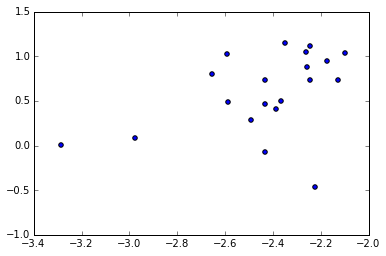

In [94]:
for frame in this_seq:
    plt.scatter(frame[0],frame[1])

In [98]:
times_path= parent_dir+A_run_dir+A_run_dir + '_times.csv'

time_step = util.calc_time_step(times_path,stride = 200)

In [78]:
time_step

36.0